In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms as transforms
from model import color_gan
from skimage import color
from model.unet import GrayLayer
%matplotlib inline

In [7]:
image_paths = ['test_images/201%s.jpg' % x for x in [2,3,4,5,6]]

In [11]:
crop = transforms.RandomCrop([256, 256])
to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

def rgb2lab(img):
    return color.rgb2lab(img)

def lab2rgb(img):
    return color.lab2rgb(img)

def crop_image(img):
    """
    Random crop images to 256 * 256
    :param img:
    :return:
    """
    if img.size[0] < 256 or img.size[1] < 256:
        img = resize(img)

    img = crop(img)
    img = np.array(img)
    lab_image = rgb2lab(img)
    return torch.FloatTensor([lab_image[:,:,0]]), \
           torch.FloatTensor([lab_image[:,:,0], lab_image[:,:,1],lab_image[:,:,2]])


In [12]:
images = [Image.open(p) for p in image_paths]

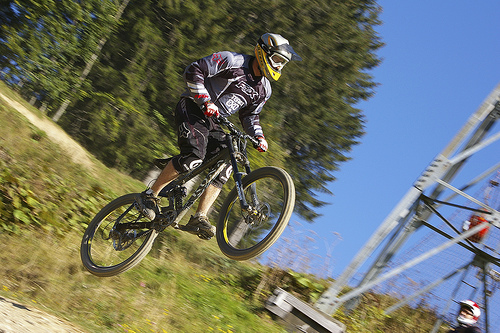

In [17]:
image_ = images[3]
image_

In [59]:
l, lab = crop_image(image_)
to_pil(lab)
print(lab)


( 0 ,.,.) = 
   29.2991   22.5295   15.2468  ...    57.9521   57.9521   57.9521
   24.7363   24.7880   10.8897  ...    58.3286   57.9521   57.9521
   26.9251   22.5015   17.7134  ...    58.3286   57.9521   57.5753
              ...                ⋱                ...             
   45.2458   43.5008   44.1760  ...    64.6987   65.8966   64.8614
   43.4976   41.7121   41.9707  ...    65.3009   63.7371   62.6926
   32.0565   39.6148   39.4702  ...    63.5644   62.4872   65.9191

( 1 ,.,.) = 
   -6.1103   -6.6644   -5.4557  ...     7.5666    7.5666    7.5666
   -6.9283   -6.2637   -2.1722  ...     7.5071    7.5666    7.5666
   -6.8466   -3.6302   -1.8203  ...     7.5071    7.5666    7.6268
              ...                ⋱                ...             
   -4.3923   -7.1711   -5.6067  ...     7.4102    7.2264    5.3683
   -2.8518   -5.7716   -6.6661  ...     4.6237    3.8240    4.1553
   -1.3294   -3.7585   -6.9528  ...     3.3931    3.0670    3.1052

( 2 ,.,.) = 
   19.0875   17.6308

In [40]:
input_tensor = Variable(l)


torch.Size([1, 256, 256])

In [23]:
import collections
Opt = collections.namedtuple('Opt', 'train, gpu')
opt = Opt(
    train=False,
    gpu=False
)

In [24]:
model = color_gan.ColorGAN(opt)

init network


In [26]:
model.load_state_dict('model_params/generator_cpu_params_1199.pth')

Load State Dict finished


In [42]:
result_out = model.inference(input_tensor.unsqueeze(0))

In [43]:
result_out.size()

torch.Size([1, 3, 256, 256])

In [58]:
result = to_pil(result_out[0].data)
result = np.array(result)
print(result)
result = lab2rgb(result)*255

[[[105 253 180]
  [242 162 155]
  [103  52  11]
  ..., 
  [ 30  18   2]
  [244 241  12]
  [ 61  40 180]]

 [[ 46  59  21]
  [ 52  54  42]
  [ 61 187 183]
  ..., 
  [ 92 203 211]
  [ 13 229  91]
  [  0 230  29]]

 [[140   0 220]
  [ 94 238  30]
  [147 192 226]
  ..., 
  [ 76  90  19]
  [132 193 195]
  [209  13  21]]

 ..., 
 [[109 140  97]
  [166 222  83]
  [ 96 184 149]
  ..., 
  [193 101  45]
  [ 52 249 178]
  [248 195 238]]

 [[179  93  60]
  [ 80  75 208]
  [ 15  69 126]
  ..., 
  [114 110  54]
  [232 146 155]
  [228 179 255]]

 [[232  80  17]
  [219  98 214]
  [250 149 215]
  ..., 
  [191 211   9]
  [ 25 140 243]
  [215  14 160]]]


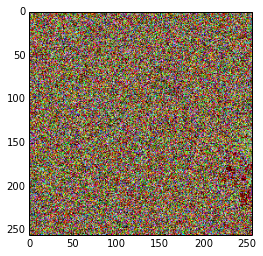